In [7]:
from bs4 import BeautifulSoup
import requests

In [8]:
url = 'https://coinmarketcap.com/currencies/bitcoin/'

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

<!DOCTYPE html>
<html dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no, shrink-to-fit=no" name="viewport"/><link href="/manifest.json" rel="manifest"/><script type="application/ld+json">{"@context":"https://schema.org/","@type":"Product","name":"Bitcoin","aggregateRating":{"@type":"AggregateRating","ratingValue":4.6,"bestRating":5,"ratingCount":3,"itemReviewed":""}}</script><meta content="https://coinmarketcap.com/currencies/bitcoin/" property="og:url"/><link href="https://coinmarketcap.com/currencies/bitcoin/" rel="canonical"/><link href="https://coinmarketcap.com/ar/currencies/bitcoin/" hreflang="ar" rel="alternate"/><link href="https://coinmarketcap.com/bg/currencies/bitcoin/" hreflang="bg" rel="alternate"/><link href="https://coinmarketcap.com/cs/currencies/bitcoin/" hreflang="cs" rel="alternate"/><link href="https://coinmarketcap.com/da/curren
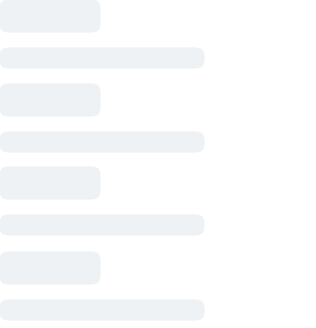

In [9]:
print(soup)

In [10]:
soup.find('span', class_ = 'sc-65e7f566-0 lsTl')

<span class="sc-65e7f566-0 lsTl" data-role="coin-name" title="Bitcoin">Bitcoin<span class="sc-65e7f566-0 eQBACe coin-name-mobile"> price</span></span>

In [11]:
soup.find('span', class_ = 'sc-65e7f566-0 lsTl').text

'Bitcoin price'

In [12]:
crypto_name = soup.find('span', class_ = 'sc-65e7f566-0 lsTl').text
print(crypto_name)

Bitcoin price


In [13]:
final_crypto_name = crypto_name.replace('price', '')
print(final_crypto_name)

Bitcoin 


In [14]:
soup.find('span', class_ = 'sc-65e7f566-0 WXGwg base-text')

<span class="sc-65e7f566-0 WXGwg base-text" data-test="text-cdp-price-display">$91,123.24</span>

In [15]:
crypto_price = soup.find('span', class_ = 'sc-65e7f566-0 WXGwg base-text').text
print(crypto_price)

$91,123.24


In [16]:
final_crypto_price = crypto_price.replace('$', '')
print(final_crypto_price)

91,123.24


In [17]:
from datetime import datetime # to record time stamp

date_time = datetime.now()

print(date_time)

2024-11-14 16:10:03.330506


In [18]:
# setting up df

In [19]:
import pandas as pd

In [20]:
date_time = datetime.now() # need to put here to always update

dict = {'Crypto Name': final_crypto_name,
        'Price': final_crypto_price,
        'TimeStamp': date_time}

df = pd.DataFrame(dict, index = [0]) # need to specify index else error or pd.DataFrame([dict])
df

,Crypto Name,Price,TimeStamp
0,Bitcoin,"91,123.24",2024-11-14 16:10:03.357379


In [21]:
# put into csv

In [22]:
df.to_csv(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv')

In [23]:
import os

In [24]:
if os.path.exists(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv'):
    df.to_csv(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv', mode = 'a', header = False, index = False)
else:
    df.to_csv(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv')

# Pulling everything together

In [26]:
from bs4 import BeautifulSoup
import requests

import pandas as pd

from datetime import datetime

import os

import time


In [27]:
def automated_crypto_pull():
    url = 'https://coinmarketcap.com/currencies/bitcoin/'
    
    page = requests.get(url)
    
    soup = BeautifulSoup(page.text, 'html')
    
    crypto_name = soup.find('span', class_ = 'sc-65e7f566-0 lsTl').text
    final_crypto_name = crypto_name.replace('price', '')
    
    crypto_price = soup.find('span', class_ = 'sc-65e7f566-0 WXGwg base-text').text
    final_crypto_price = crypto_price.replace('$', '')
    
    date_time = datetime.now() # need to put here to always update
    dict = {'Crypto Name': final_crypto_name,
            'Price': final_crypto_price,
            'TimeStamp': date_time}
    
    df = pd.DataFrame(dict, index = [0]) # need to specify index else error or pd.DataFrame([dict])
    
    if os.path.exists(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv'):
        df.to_csv(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv', mode = 'a', header = False, index = False)
    else:
        df.to_csv(r'D:\Analyst Builder\Python\Crypto Web Puller\Crypto_Automated_Pull.csv', index = False)
    print(df)

In [ ]:
while True:
    automated_crypto_pull()
    time.sleep(3600)

  Crypto Name      Price                  TimeStamp
0    Bitcoin   91,123.24 2024-11-14 16:10:03.883750
